# Import de bibliotecas e Conexão com o drive

Link Dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [15]:
# Importação de Bibliotecas e Funções
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.naive_bayes import BernoulliNB #É uma classe de Naive Bayes implementando o algoritmo de Naive Bayes para variáveis de distribuição de Bernoulli. É adequado para dados binários ou binarizados, onde cada recurso é tratado como uma variável de Bernoulli.
from sklearn.naive_bayes import GaussianNB #É uma classe de Naive Bayes implementando o algoritmo de Naive Bayes para variáveis de distribuição Gaussiana. É adequado para dados contínuos, onde cada recurso é assumido como uma variável Gaussiana
from sklearn.naive_bayes import MultinomialNB #É uma classe de Naive Bayes implementando o algoritmo de Naive Bayes para variáveis de distribuição multinomial. É adequado para dados discretos, como contagens inteiras, onde cada recurso é tratado como uma variável multinomial.
from sklearn.metrics import classification_report #É uma função que gera um relatório de classificação que mostra várias métricas de avaliação para um modelo de classificação, como precisão, recall, F1-score e suporte.
from sklearn.model_selection import cross_validate #É uma função que realiza a validação cruzada de um modelo, fornecendo várias métricas de avaliação em cada divisão dos dados.
from sklearn.model_selection import train_test_split #É uma função que divide um conjunto de dados em conjuntos de treinamento e teste, permitindo avaliar o desempenho do modelo em dados não vistos durante o treinamento.
from sklearn.preprocessing import MinMaxScaler #É uma classe para pré-processamento de dados que dimensiona (normaliza) os recursos de um conjunto de dados para um intervalo específico, comumente entre 0 e 1.
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # Calcular a acuracia do classificador
from sklearn.tree import plot_tree
from sklearn import model_selection # necessario para fazer validação cruzada
from sklearn.neural_network import MLPClassifier # rede neural
from sklearn.metrics import confusion_matrix # plotar as matriz de confusão
from sklearn.linear_model import LinearRegression # Regressão Linear

In [16]:
# Conexão com o google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [25]:
# Leitura do Dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diabetes_prediction/diabetes_prediction_dataset.csv')

# Análise do dataset

In [5]:
len(df.index)

100000

In [18]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [19]:
df.smoking_history.value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [8]:
df.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

# Tratamento de dados

In [26]:
# Converter os valores de genero de string para num
converte = {'Female': 0.0, 'Male':1.0, 'Other':2.0}
df = df.applymap(lambda s: converte.get(s) if s in converte else s)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,never,25.19,6.6,140,0
1,0.0,54.0,0,0,No Info,27.32,6.6,80,0
2,1.0,28.0,0,0,never,27.32,5.7,158,0
3,0.0,36.0,0,0,current,23.45,5.0,155,0
4,1.0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0.0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1.0,66.0,0,0,former,27.83,5.7,155,0
99998,0.0,24.0,0,0,never,35.42,4.0,100,0


In [27]:
# Converter os valores de Histórico de Fumante de string para num
converte = {'No Info': 0.0, 'never':1.0, 'former':2.0, 'current':3.0, 'not current':4.0, 'ever':5.0}
df = df.applymap(lambda s: converte.get(s) if s in converte else s)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,1.0,25.19,6.6,140,0
1,0.0,54.0,0,0,0.0,27.32,6.6,80,0
2,1.0,28.0,0,0,1.0,27.32,5.7,158,0
3,0.0,36.0,0,0,3.0,23.45,5.0,155,0
4,1.0,76.0,1,1,3.0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0,0,0.0,27.32,6.2,90,0
99996,0.0,2.0,0,0,0.0,17.37,6.5,100,0
99997,1.0,66.0,0,0,2.0,27.83,5.7,155,0
99998,0.0,24.0,0,0,1.0,35.42,4.0,100,0


In [ ]:
df.smoking_history.value_counts()

0.0    35816
1.0    35095
2.0     9352
3.0     9286
4.0     6447
5.0     4004
Name: smoking_history, dtype: int64

In [28]:
# Definição de parâmetros
x = df.drop('diabetes', axis=1)
y = df['diabetes']
x.shape, y.shape

((100000, 8), (100000,))

In [29]:
# Normalização dos dados
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns.values)
x.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.0,1.000000,0.0,1.0,0.2,0.177171,0.563636,0.272727
1,0.0,0.674675,0.0,0.0,0.0,0.202031,0.563636,0.000000
2,0.5,0.349349,0.0,0.0,0.2,0.202031,0.400000,0.354545
3,0.0,0.449449,0.0,0.0,0.6,0.156863,0.272727,0.340909
4,0.5,0.949950,1.0,1.0,0.6,0.118231,0.236364,0.340909


In [30]:
# Dividindo os Conjuntos entre treino 75% e teste 25%
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.75)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, stratify=y_test, train_size=0.25)
x_train.shape, x_test.shape, x_valid.shape, y_train.shape, y_test.shape, y_valid.shape

((75000, 8), (6250, 8), (18750, 8), (75000,), (6250,), (18750,))

# KNN

In [33]:
# Declarando o classificador de KNN
c_knn = skl.neighbors.KNeighborsClassifier(n_neighbors=8)

# Treinamento do classificador com o conjunto de treino
c_knn.fit(x_train, y_train)

# Predição de rotulos da base de teste utilizando a árvore de decisão
y_pred = c_knn.predict(x_test)

# Exibição de resultados
k_accuracy = accuracy_score(y_test, y_pred)
round((k_accuracy * 100).mean(), 3)

95.872

# Decision Tree

In [36]:
# Criação de árvore de decisão
t = DecisionTreeClassifier(max_depth=8)
# Treinamento da árvore de decisão ao conjunto de treino
t.fit(x_train, y_train)
# Predição de rotulos da base de teste utilizando a árvore de decisão
y_pred = t.predict(x_test)
# Exibição de resultados
t_accuracy = accuracy_score(y_test, y_pred)
round((t_accuracy * 100).mean(), 3)

97.088

# RNA

In [54]:
# Organização do conjunto de dados
sc = StandardScaler()
scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [55]:
# Criação de rede neural
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,25,10), max_iter = 1500,activation = 'relu', solver = 'adam')

# Treinamento de rede neural com o conjunto de treino
mlp_clf.fit(x_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(50, 25, 10), max_iter=1500)

In [56]:
# Predição de rotulos da base de teste utilizando a árvore de decisão
y_pred = mlp_clf.predict(x_test_scaled)

# Exibição de resultados
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)*100))

Accuracy: 97.04


Text(50.722222222222214, 0.5, 'Valores reais')

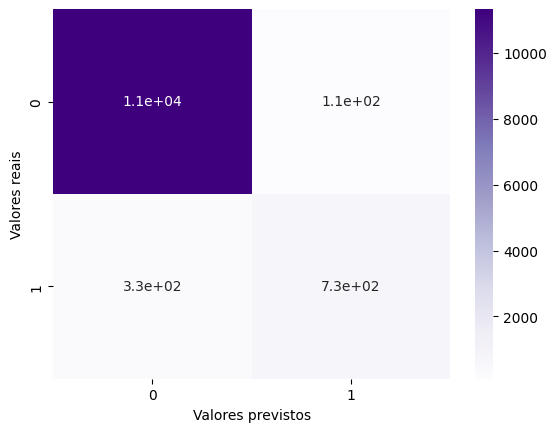

In [ ]:
# Matriz de Confussão
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Purples')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')

# Resultados